## Example notebook to showcase queryint data from the data donation project

Find documentation for all data donation related raw and post processed data at
https://rocs-dbt-docs.netlify.app

particularly https://rocs-dbt-docs.netlify.app/#!/model/model.data_pipelines.vitals_std_by_date_and_user_before_infection

## Postgres database

In [ ]:
from datenspende.utils import query_pg_df
from psycopg.sql import SQL

In [1]:


# query rhr relative to reported tests

df = query_pg_df(
    SQL(
        """
    select 
        v.user_id, 
        v.value_minus_mean_from_value_minus_mean as rhr, 
        (v.date - t.test_week_start) as day, 
        t.f10 test_result
    from 
        datenspende_derivatives.homogenized_features t, 
        datenspende_derivatives.vitals_std_by_date_and_user_before_infection v
    where 
        v.user_id = t.user_id and
        v.type = 65 and
        v.date > t.test_week_start - 10 AND
        v.date < t.test_week_start + 50
    """
    )
)
df

/home/jovyan/datenspende-science/datenspende/utils/load_from_postgres.py:45: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql(query, conn)


,user_id,rhr,day,test_result
0,452,-0.815214,26,True
1,452,-0.777594,27,True
2,452,-7.630966,-8,None
3,452,3.196193,39,None
4,452,3.196193,7,True
...,...,...,...,...
23787716,957043,-1.869933,39,True
23787717,959250,-2.395280,-5,False
23787718,959250,-6.153857,22,False
23787719,959250,10.523647,18,False


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23787721 entries, 0 to 23787720
Data columns (total 4 columns):
 #   Column       Dtype  
---  ------       -----  
 0   user_id      int64  
 1   rhr          float64
 2   day          int64  
 3   test_result  object 
dtypes: float64(1), int64(2), object(1)
memory usage: 725.9+ MB


<AxesSubplot: xlabel='day', ylabel='rhr'>

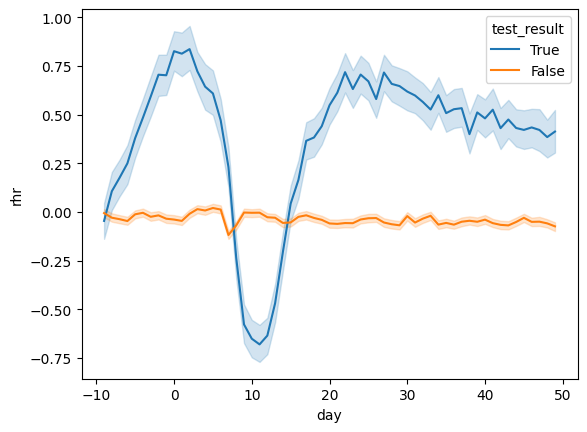

In [3]:
import seaborn as sns

sns.lineplot(data=df, x="day", y="rhr", hue="test_result")

## Clickhouse database (epoch data)

In [ ]:
from datenspende.utils import query_ch_df

df = query_ch_df(
        """DESCRIBE TABLE rocs.test_table"""
    )
df

